### Author: Vaishnav Krishna P
#### INTERNSHIP : TEACHNOOK
#### Dataset Link: https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews?resource=download

#### Context : 
- Webportals like Bhuvan get vast amount of feedback from the users. To go through all the feedback's can be a tedious job. You have to categorize opinions expressed in feedback forums. This can be utilized for feedback management system. We Classification of individual comments/reviews.and we also determining overall rating based on individual comments/reviews. So that company can get a complete idea on feedback's provided by customers and can take care on those particular fields. This makes more loyal Customers to the company, increase in business , fame ,brand value ,profits.
#### About the dataset : 
- 1. reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
- 2. asin - ID of the product, e.g. 0000013714
- 3. reviewerName - name of the reviewer
- 4. helpful - helpfulness rating of the review, e.g. 2/3
- 5. reviewText - text of the review
- 6. overall - rating of the product
- 7. summary - summary of the review
- 8. unixReviewTime - time of the review (unix time)
- 9. reviewTime - time of the review (raw)
#### Task : 
- You have to perform Sentimental Analysis for this data. Help the organization to understand better about their customer feedback's So that they can concentrate on those issues customer's are facing. Build the model which has highest accuracy in classifying the feedback as positive,Negative and neutral.
- Task 1 : You have to categorize opinions expressed in feedback forums
- Task 2 : You have to classify individual comments/reviews and you have to determine overall rating based on individual
comments/reviews.

In [221]:
# importing the necessory libraries 
import string
import pickle
import re
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
# Ignoring the unnecessory warnings 
import warnings
warnings.filterwarnings(action='ignore')
# Machine Learning models 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# downloading the stopwords 
from nltk import word_tokenize,download
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
# downloading necessory libraries from NLTK
download('punkt')
download('punkt_tab')
download('stopwords')
download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vyshnavkrishna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/vyshnavkrishna/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vyshnavkrishna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vyshnavkrishna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Loading the dataset 
df = pd.read_csv('Musical_instruments_reviews.csv')

In [5]:
# first five data records 
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


#### INFORMATION ABOUT THE DATASET

In [7]:
# dimension of the dataset 
df.shape

(10261, 9)

- There are 10,261 records and 9 features.

In [9]:
# datatype of the dataset
df.dtypes

reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
dtype: object

- Except for the overall(rating) and unix review time all the features are objects(string)

In [11]:
# missing values of the dataset 
df.isna().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [12]:
# features with missing values are : 
print("Features with missing values")
for feature in df.columns:
    if df[feature].isna().sum() > 0:
        print(f"\033[1m {feature} \033[0m has Missing values: {df[feature].isna().sum()}")

Features with missing values
 reviewerName  has Missing values: 27
 reviewText  has Missing values: 7


#### REVIEW & RATING : 

In [14]:
# Analysing the rating and the reviewText relation
for i in range(10,20):
    print("RECORD {}\n".format(i))
    print("Review : {} \n\nSummary: {} \n\nRating: {}\n".format(df['reviewText'][i], df['summary'][i], df['overall'][i]))

RECORD 10

Review : Monster makes a wide array of cables, including some that are very high end. I initially purchased a pair ofMonster Rock Instrument Cable - 21 Feet - Angled to Straight 1/4-Inch plugto use with my keyboards, but when it came time to purchase cables for my bass and guitar I thought I'd pinch a few pennies.  I am so glad I did.I compared this cable model to the more expensive models I previously purchased and, aside from looks, could not detect any difference in sound. I Swapped back and forth between my guitars and keyboards, ensuring that each model was used on each instrument - still no difference.What the more expensive model has going for it is looks. I am not sure it (the higher priced model) is even more sturdy because the molded stress relief ends on this model seem to make it more reliable than its pricier sibling.Bottom line: carefully compare both cables using your own instrument and amp - if possible - before making a purchase decision. You may find, as I 

- from the above analysis, it is understandable that only review or summary cannot give a good accuracy it is better to combine those two for better prediction.

#### RATING DISTRIBUTION 

In [17]:
# Checking the values of rating 
df['overall'].value_counts()

overall
5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: count, dtype: int64

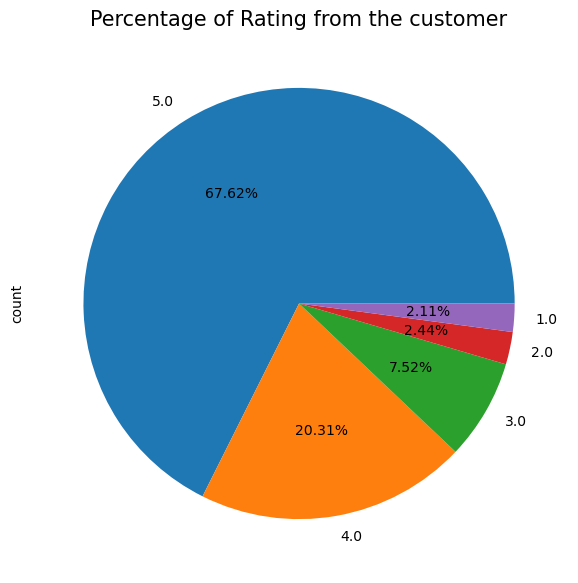

In [18]:
plt.title("Percentage of Rating from the customer", color='black', fontsize = 15)
df['overall'].value_counts().plot(kind='pie', autopct='%1.2f%%', figsize=(7,7))
plt.show()

In [19]:
# Percentage of reviewText rating of each value 
print("\033[1mRating Distribution\033[0m")
for rating_value, percentage in zip(df['overall'].value_counts().index, np.round((df['overall'].value_counts().values/len(df)*100),2) ):
    print(f"{rating_value} Rating: percentage overall \033[1m{percentage}\033[0m")

Rating Distribution
5.0 Rating: percentage overall 67.62
4.0 Rating: percentage overall 20.31
3.0 Rating: percentage overall 7.52
2.0 Rating: percentage overall 2.44
1.0 Rating: percentage overall 2.11


##### Note 
- Based on the pie chart and analysis, ratings of 4 and 5 indicate a positive review, a rating of 3 is considered neutral, and ratings below 3 are classified as negative reviews.
- Since the percentage of negative review and neutral is very small compare to the positive review, model will face some kind of imabalacing issues we can see it later.

In [21]:
# Adding two features ie, reviewYear and reviewMonth for analysis
df['review_date'] = pd.to_datetime(df['reviewTime'])
df['reviewYear'] = df['review_date'].dt.year
df['reviewMonth'] = df['review_date'].dt.month

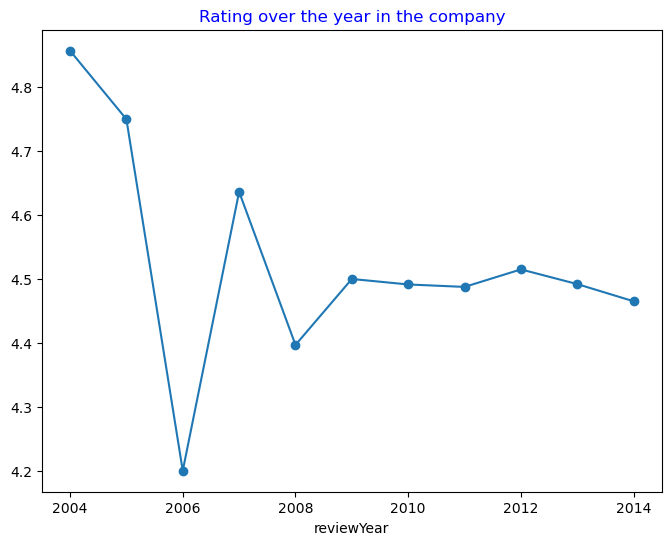

In [22]:
# Rating of the company over the year
plt.title("Rating over the year in the company", color='blue')
df.groupby(df['reviewYear'])['overall'].mean().plot(figsize=(8,6), marker='o')
plt.grid(False)
plt.show()

In [23]:
# Average rating of the company 
df['overall'].mean()

4.488743787155248

##### Note: 
- Average rating of the company is 4.48.

#### REMOVING THE RECORED WITH MISSING VALUES

In [26]:
# Removing the features where the review text is missing 
df = df[~df['reviewText'].isna()]

In [27]:
# Checking the shape of the dataset after removing the missing values 
df.shape

(10254, 12)

Note: 
- Reviewer Name does not contribute too much in sentimental analysis, so not removing the record with Nan reviewerName

#### LABEL THE REVIEW INTO POSTIVE, NEGATIVE AND NEUTRAL

In [30]:
# Function for Labelling the review 
def Label_review(data):
    if data['overall'] > 3.0:
        return "Positive"
    elif data['overall'] == 3.0:
        return "Neutral"
    else:
        return "Negative"

df['Label'] = df.apply(Label_review, axis=1)

In [31]:
# Checking the value counts of each Label 
df['Label'].value_counts()

Label
Positive    9015
Neutral      772
Negative     467
Name: count, dtype: int64

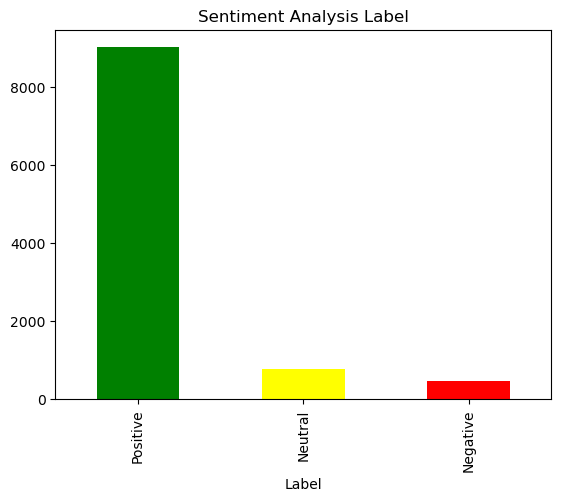

In [32]:
# Define colors for labels
color_map = {'Positive': 'green', 'Neutral': 'yellow', 'Negative': 'red'}
plt.title("Sentiment Analysis Label")
df['Label'].value_counts().plot(kind='bar', color=[color_map[label] for label in df['Label'].value_counts().index])
plt.show()

#### COMBINING THE SUMMARY AND REVIEW TEXT -> FINAL REVIEW 

In [34]:
#### Combining the Summary and the reviewText 
df['final_review'] = df['summary'] + " " + df['reviewText']

In [35]:
# sample record 
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,review_date,reviewYear,reviewMonth,Label,final_review
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",2014-02-28,2014,2,Positive,"good Not much to write about here, but it does..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",2013-03-16,2013,3,Positive,Jake The product does exactly as it should and...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",2013-08-28,2013,8,Positive,It Does The Job Well The primary job of this d...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",2014-02-14,2014,2,Positive,GOOD WINDSCREEN FOR THE MONEY Nice windscreen ...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",2014-02-21,2014,2,Positive,No more pops when I record my vocals. This pop...


### TEXT CLEANING

In [37]:
# Lets analyse the review to clean 
for i in range(40,50):
    print(f"Record {i}: {df["final_review"][i]} \n\n")

Record 40: great value Nice solid cables, with excellent support at the ends.  Should last a lifetime of usage no problem and just what I needed to connect my tube preamp. 


Record 41: Five Stars Good quality cable and sounds very good 


Record 42: Pretty cheap cable that has lasted so far Zero issues with this cable so far.  It feels fairly cheap and light weight but it has survived for months of plugging in, unplugging, and packing between practice spaces.I'll update this review if/when it breaks. 


Record 43: very nice cable Realtively inexpensive patch cable for electric guitar.I have had it for a few months and so far it has held up pretty well 


Record 44: Nice guitar cable, even better price I bought this because I wanted a cheap replacement cable for one that had a short. I'm pleasantly surprised with this cable. It's decent sound and decent build quality, for a good price. 


Record 45: Does What You Want This is a very nice cable for the price. I already bent one end of i

Note : 
- Convert the text in to lower case.
- Convert all the numbers to the text
- Remove comma,fullstop,hyphen,division including all the punchuations
- Removing the new lines
- Remove the links in the text which is not required 

In [39]:
# Step 1: Converting to the lower case 
# eg: text = I am Happy 
text = "I am Happy"
text.lower()

'i am happy'

In [40]:
# Step 2: Remove the punchuation marks 
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Example usage
text = "Hello, world! Let's remove: all punctuations."
clean_text = remove_punctuation(text)
print(f"Clean text: {clean_text}")

Clean text: Hello world Lets remove all punctuations


In [41]:
# Step 3: removing numbers in the text 
def remove_numbers(text):
    return text.translate(str.maketrans('', '', '0123456789')) 

text = "Text1 with numbe5rs 456783"
remove_numbers(text)

'Text with numbers '

In [42]:
# Step 4: Deleting newlines in the text 
Text = '''hello 
world 
This 
is 
sample 
text'''
Text = re.sub('\n', '', Text)
print(Text)

hello world This is sample text


In [43]:
# Step 5: Removing the links in the text 
Text = "https://google.com This is a google link "
Text = re.sub('https?://\S+|www\.\S+', '', Text)
print(Text)

 This is a google link 


In [44]:
# function for performing all of these actions 
def text_cleaning(text):
    # Step1 : Converting the text to lower case 
    text = text.lower()
    # Step2 : Removing all the punctuation marks in the string 
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Step3: Removing all the numbers 
    text = text.translate(str.maketrans('', '', '0123456789')) 
    # step4: Removing the new lines 
    text = re.sub('\n', '', text)
    # step5: Removing all the links  in text
    text = re.sub('https?://\S+|www\.\S+', '', text)

    return text

In [45]:
# Applyting the function to each of the text
df['clean_text'] = df['final_review'].apply(lambda text:text_cleaning(text))

In [46]:
# Difference between Orginal text and clean text 
for i in range(5,10):
    print(f"\nRecord {i}: \n\n\033[1mOrginal text\033[0m: {df["final_review"][i]},\n\n\033[1mClean text\033[0m: {df["clean_text"][i]}")


Record 5: 

Orginal text: The Best Cable So good that I bought another one.  Love the heavy cord and gold connectors.  Bass sounds great.  I just learned last night how to coil them up.  I guess I should read instructions more carefully.  But no harm done, still works great!,

Clean text: the best cable so good that i bought another one  love the heavy cord and gold connectors  bass sounds great  i just learned last night how to coil them up  i guess i should read instructions more carefully  but no harm done still works great

Record 6: 

Orginal text: Monster Standard 100 - 21' Instrument Cable I have used monster cables for years, and with good reason. The lifetime warranty is worth the price alone. Simple fact: cables break, but getting to replace them at no cost is where it's at.,

Clean text: monster standard    instrument cable i have used monster cables for years and with good reason the lifetime warranty is worth the price alone simple fact cables break but getting to replace

- text is now clean and ready for the next preprcessing

### TEXT PREPROCESSING
1. Word Tokenize : Converting the sentence in to list of words.
2. Applying stopwords : to remove the words which lacks independent meaning.
3. Applying Word lemmatizer: to get root of words
4. Joining back list to string 

In [49]:
# Step1(Word Tokenizer): Converting the sentence in to list of words 
text = "This is my cat"
text = word_tokenize(text)
print(text)

['This', 'is', 'my', 'cat']


In [50]:
# step2(Applying stop words)
print("STOP WORDS IN ENGLISH: ")
for word in stopwords.words('english'):
    print(f"{word}", end=", ")

STOP WORDS IN ENGLISH: 
i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, might

In [51]:
# Removing the stop words from the above text
text = [word for word in text if word not in stopwords.words('english')]
print(text)

['This', 'cat']


In [52]:
# Step3(Applying Lemmatizer): Applying lematizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("pricing", pos="v")) # Get the root word 

price


In [53]:
# Funtion for preprocessing the text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)  # Convert to lowercase and tokenize

    # Remove stopwords
    Stopwords = set(stopwords.words('english')) - set(["not"])
    filtered_tokens = [word for word in tokens if word not in Stopwords]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos='v') for word in filtered_tokens]

    return " ".join(lemmatized_tokens)

In [54]:
# Preprocess the text 
preprocess_text(df['clean_text'][0])

'good not much write exactly suppose filter pop sound recordings much crisp one lowest price pop filter amazon might well buy honestly work despite price'

In [55]:
df['clean_text'][0]

'good not much to write about here but it does exactly what its supposed to filters out the pop sounds now my recordings are much more crisp it is one of the lowest prices pop filters on amazon so might as well buy it they honestly work the same despite their pricing'

In [56]:
# Applying the preprocessed text
df['preprocessed_text'] = df['clean_text'].apply(lambda text:preprocess_text(text))

In [57]:
# Difference between Orginal text and clean text 
for i in range(5):
    print(f"\nRecord {i}: \n\n\033[1mClean text\033[0m: {df["clean_text"][i]},\n\n\033[1mPreprocessed text\033[0m: {df["preprocessed_text"][i]}")


Record 0: 

Clean text: good not much to write about here but it does exactly what its supposed to filters out the pop sounds now my recordings are much more crisp it is one of the lowest prices pop filters on amazon so might as well buy it they honestly work the same despite their pricing,

Preprocessed text: good not much write exactly suppose filter pop sound recordings much crisp one lowest price pop filter amazon might well buy honestly work despite price

Record 1: 

Clean text: jake the product does exactly as it should and is quite affordablei did not realized it was double screened until it arrived so it was even better than i had expectedas an added bonus one of the screens carries a small hint of the smell of an old grape candy i used to buy so for reminiscents sake i cannot stop putting the pop filter next to my nose and smelling it after recording dif you needed a pop filter this will work just as well as the expensive ones and it may even come with a pleasing aroma like 

### LABEL THE FEATURES 

In [59]:
# Encoding the target feature 
dict_map = {"Positive":1, "Negative":0, "Neutral":2}
df['Label'] = df['Label'].map(dict_map)

In [60]:
df['Label'].value_counts()

Label
1    9015
2     772
0     467
Name: count, dtype: int64

### APPLYING TF-IDF VECTORIZATION: 

In [62]:
# Apply TF-IDF Vectorization with 2-grams (bigrams)
vectorizer = TfidfVectorizer(ngram_range=(2, 2), max_features = 5000)  # Using bigrams
X = vectorizer.fit_transform(df['preprocessed_text'])

In [223]:
# save this model as pickle 
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

In [63]:
# shape of X after applying TF-IDF
X.shape

(10254, 5000)

- Labelling is done correctly

In [65]:
# Labels 
y = df['Label']

### BALACING THE DATASET

In [67]:
Balancer = SMOTE(random_state = 42)
X_final, y_final = Balancer.fit_resample(X, y)

In [68]:
y_final.value_counts()

Label
1    9015
2    9015
0    9015
Name: count, dtype: int64

### TRAIN TEST SPLIT

In [70]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=42)

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20283, 5000), (6762, 5000), (20283,), (6762,))

### SPOT CHECKING MODELS 

In [73]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

In [74]:
# Store results for plotting
results = []

# Train models and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy for train and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store the results
    results.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
    })

In [75]:
# Print model name, train accuracy, and test accuracy
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Train Accuracy: {result['Train Accuracy']:.4f}")
    print(f"Test Accuracy: {result['Test Accuracy']:.4f}")
    print("-" * 40)

Model: Logistic Regression
Train Accuracy: 0.9391
Test Accuracy: 0.8988
----------------------------------------
Model: SVM
Train Accuracy: 0.9773
Test Accuracy: 0.9723
----------------------------------------
Model: Naive Bayes
Train Accuracy: 0.8999
Test Accuracy: 0.8724
----------------------------------------
Model: Decision Tree
Train Accuracy: 0.9943
Test Accuracy: 0.8938
----------------------------------------
Model: Random Forest
Train Accuracy: 0.9943
Test Accuracy: 0.9340
----------------------------------------
Model: KNN
Train Accuracy: 0.6586
Test Accuracy: 0.6405
----------------------------------------


Note:
- Decision Tree, Random forest give an accuracy of 99.99 but since the training accuracy is more and testing accuracy is less, model failed to generalize
- SVM Works well even for the training and testing dataset

### GRID SEARCH CV - OPTIMIZATION TECHNIQUE

- found the optimized value of kernal, C

### MODEL SELECTION AND MODEL TRANING
- since, the SVC performed well in the spot check, so we select the SVC

In [80]:
# Create the model with the best parameters
svc_model = SVC(random_state=42, kernel='rbf',C=1.26)

# Train the model on the training data
svc_model.fit(X_train, y_train)

SVC(C=1.26, random_state=42)

### MODEL EVALUATION 

Test Accuracy: 97.56 %


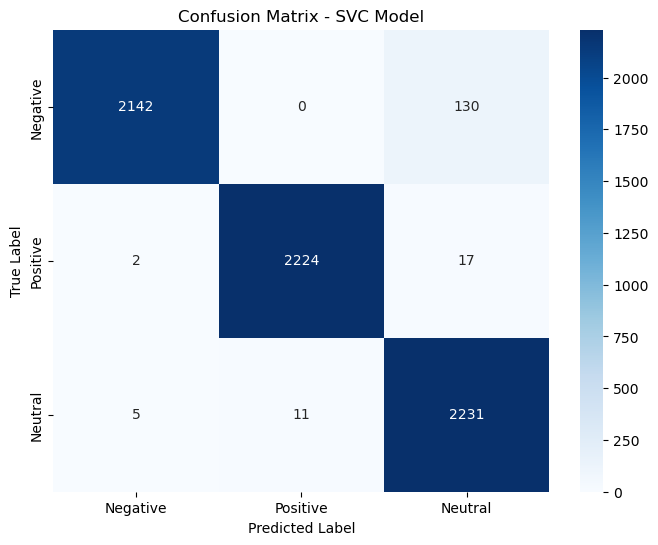

In [82]:
# Predict on the test data
y_test_pred = svc_model.predict(X_test)

# Calculate accuracy for train and test sets
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Test Accuracy: {:.2f} %".format(test_accuracy * 100))

# Confusion Matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=["Negative","Positive","Neutral"],yticklabels=["Negative","Positive","Neutral"])
plt.title('Confusion Matrix - SVC Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [83]:
# Classification report 
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2272
           1       1.00      0.99      0.99      2243
           2       0.94      0.99      0.96      2247

    accuracy                           0.98      6762
   macro avg       0.98      0.98      0.98      6762
weighted avg       0.98      0.98      0.98      6762



In [84]:
# Model is created and working with a very good accuracy of 99%.

### MODEL TESTING WITH REAL DATA 

In [184]:
def predict_sentiment(review):
    review = text_cleaning(review)
    review = preprocess_text(review)
    review_vectorized = vectorizer.transform([review])
    review_output = svc_model.predict(review_vectorized)

    if review_output == [1]:
        print("SENTIMENT: POSITIVE 😊")
    elif review_output == [2]:
        print("SENTIMENT: NEUTRAL 😐")
    else:
        print("SENTIMENT: NEGATIVE 😡")

In [212]:
# real life review samples review1(positive) and review2(negative)
neg_review = '''
not recommend didnt expect cable thin easily thickness guitar cable ive use not sure 
longterm durability signal lossinterference foresight id spend couple extra buck thicker cable still work 
inexpensiveedit months later dead already wire fray right angle jack get pay
'''
pos_review = '''
This is a good product. These work very well and are inexpensive and easy enough to put on. I like.
'''
neu_review = '''
Like many say, they do slip out easy so you need to keep that in mind, otherwise for the price and overall quality they are good cables.
'''

In [214]:
predict_sentiment(neg_review)

SENTIMENT: NEGATIVE 😡


In [216]:
predict_sentiment(pos_review)

SENTIMENT: POSITIVE 😊


In [218]:
predict_sentiment(neu_review)

SENTIMENT: NEUTRAL 😐
